# Proyecto: Dashboard Completo

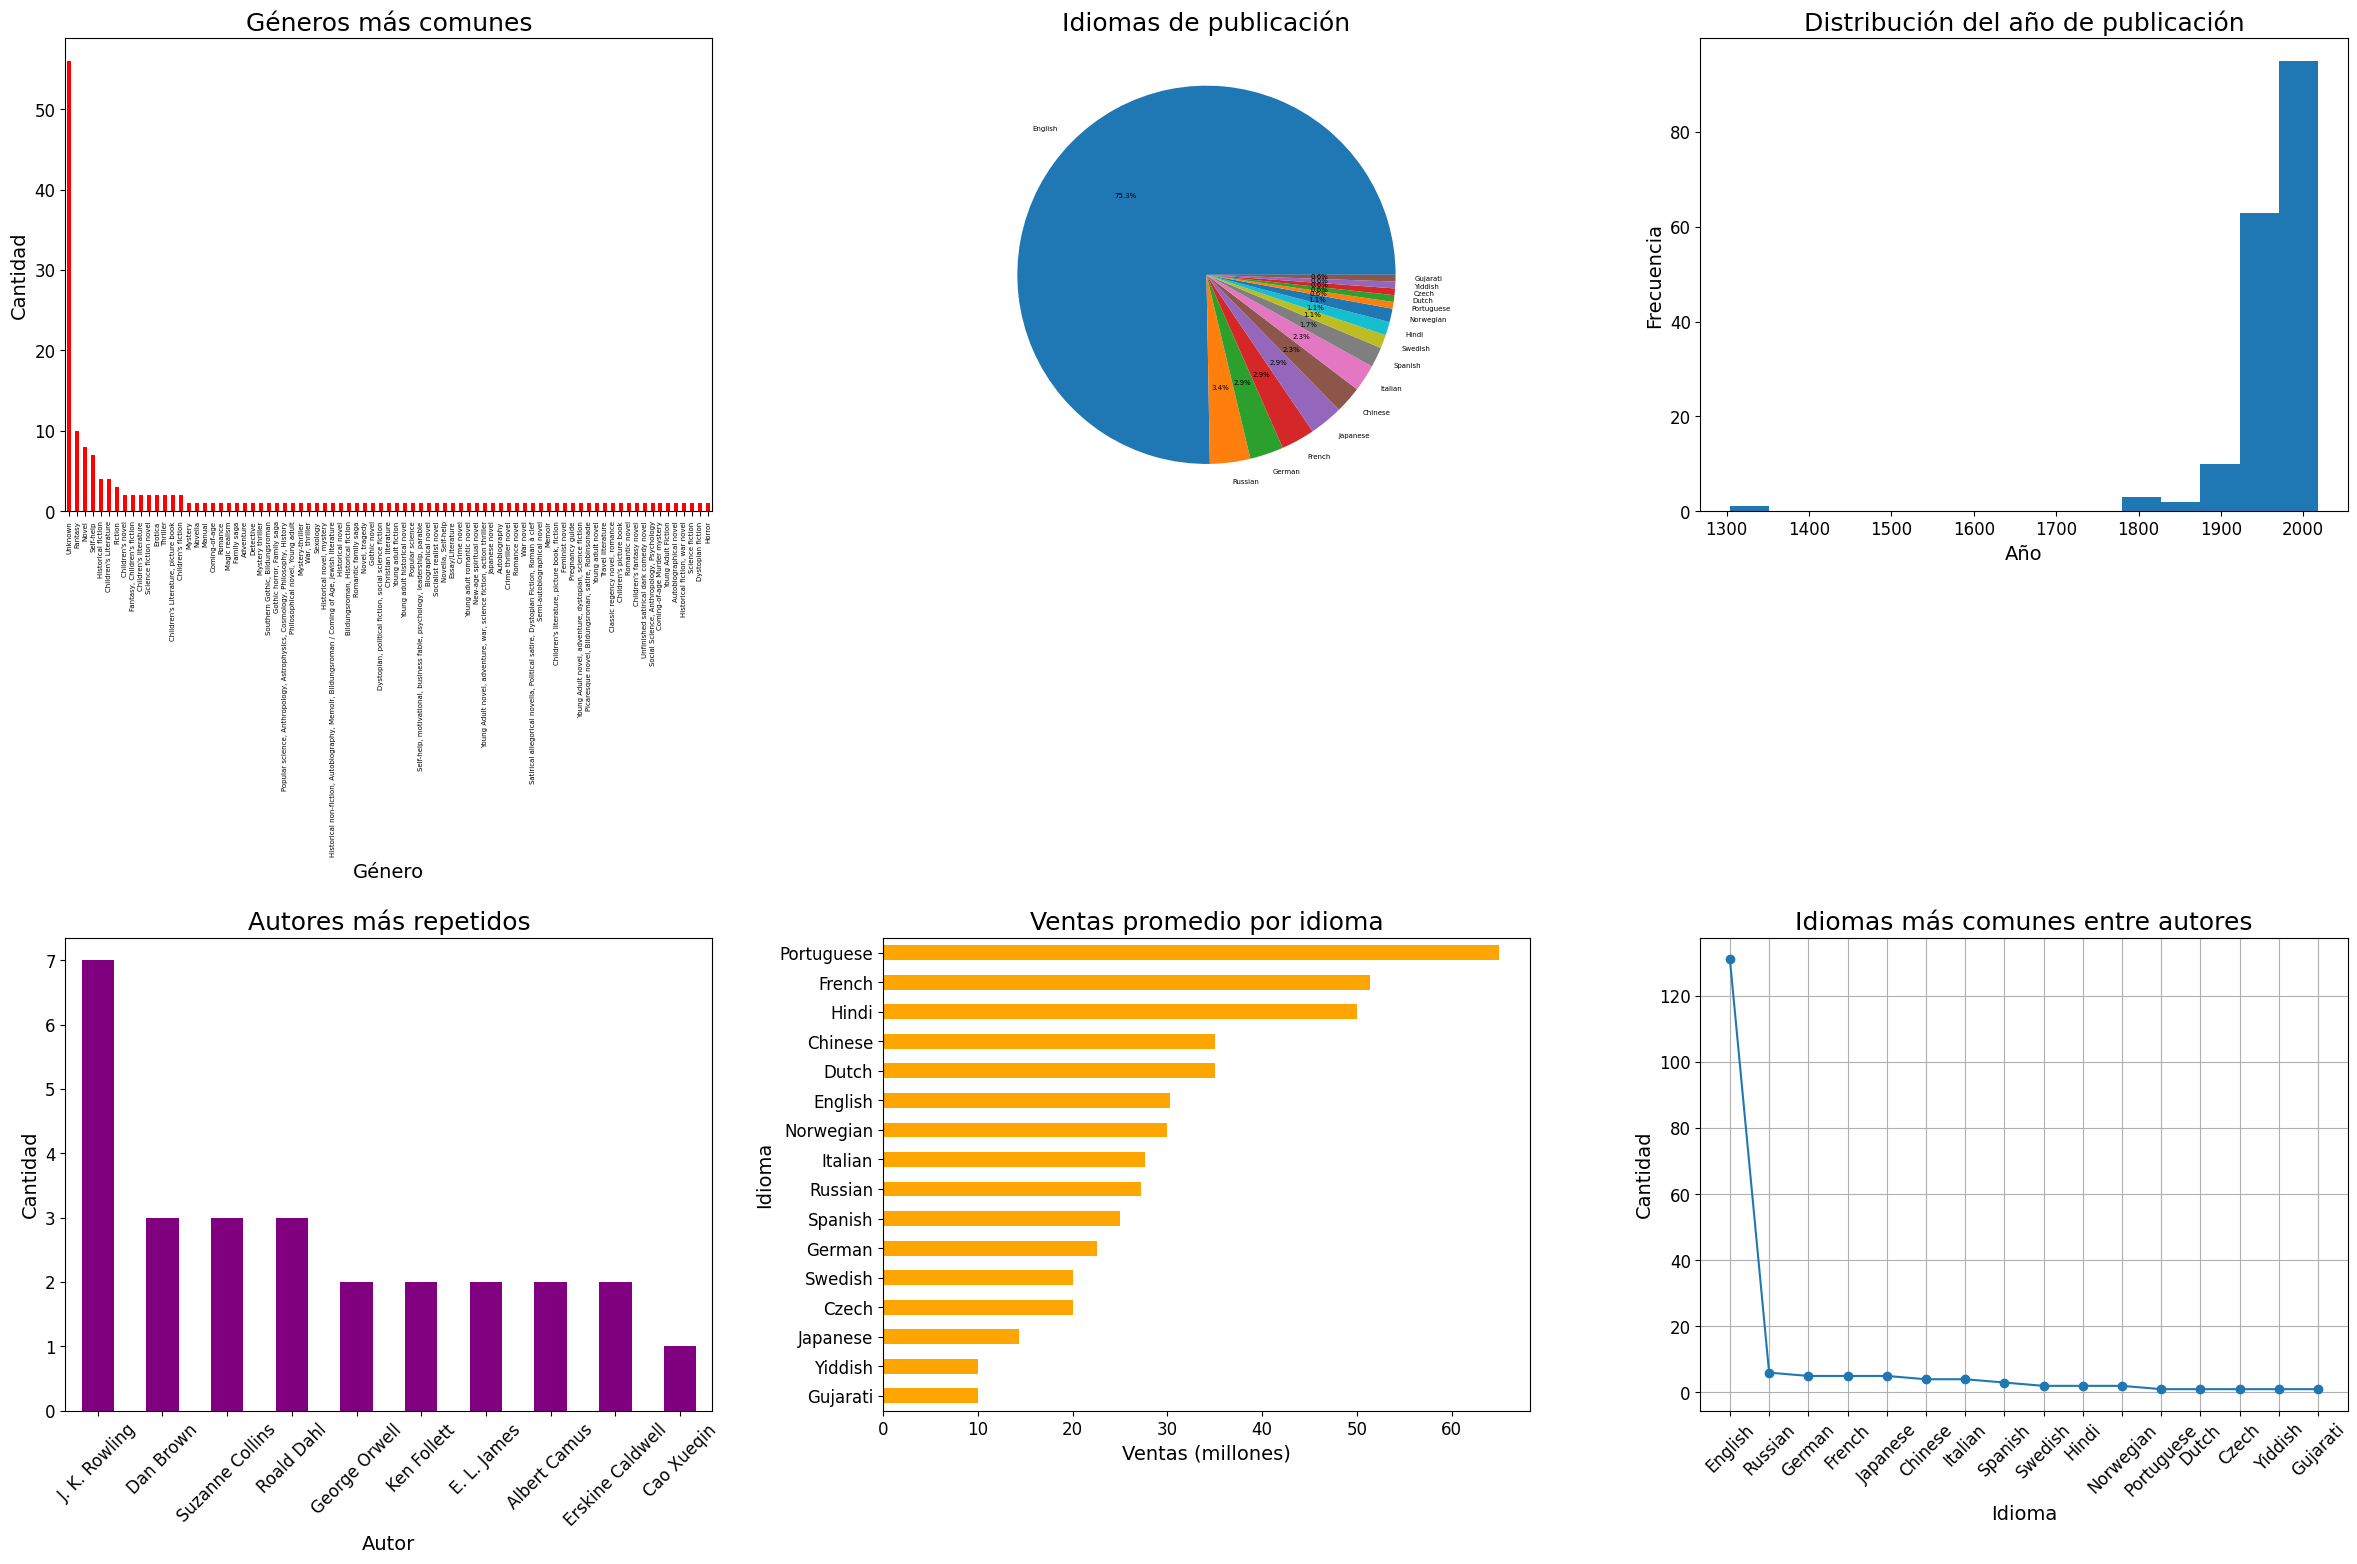

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# CARGA DEL ARCHIVO
try:
    df = pd.read_csv("/content/best-selling-books.csv", encoding="utf-8")
except:
    print("Sube el archivo:")
    uploaded = files.upload()
    df = pd.read_csv("/content/best-selling-books.csv", encoding="utf-8")

# Rellenar valores faltantes
df["Genre"] = df["Genre"].fillna("Unknown")

# CONFIGURAR FIGURA
plt.figure(figsize=(24, 16))   # más grande que antes


# 1. Géneros más comunes (grande y legible)
plt.subplot(2, 3, 1)
df["Genre"].value_counts().plot(kind="bar", color="red")
plt.title("Géneros más comunes", fontsize=18)
plt.xlabel("Género", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.xticks(rotation=90, fontsize=5)
plt.yticks(fontsize=12)


# 2. Idiomas más comunes (pie chart grande y legible)
plt.subplot(2, 3, 2)
plt.pie(
    df["Original language"].value_counts(),
    labels=df["Original language"].value_counts().index,
    autopct="%1.1f%%",
    textprops={'fontsize': 5}
)
plt.title("Idiomas de publicación", fontsize=18)


# 3. Años de publicación
plt.subplot(2, 3, 3)
df["First published"].plot(kind="hist", bins=15)
plt.title("Distribución del año de publicación", fontsize=18)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# 4. Autores más repetidos
plt.subplot(2, 3, 4)
df["Author(s)"].value_counts().head(10).plot(kind="bar", color="purple")
plt.title("Autores más repetidos", fontsize=18)
plt.xlabel("Autor", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)


# 5. Ventas promedio por idioma
plt.subplot(2, 3, 5)
df.groupby("Original language")["Approximate sales in millions"].mean().sort_values().plot(
    kind="barh",
    color="orange"
)
plt.title("Ventas promedio por idioma", fontsize=18)
plt.xlabel("Ventas (millones)", fontsize=14)
plt.ylabel("Idioma", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# 6. Idiomas más comunes (línea)
plt.subplot(2, 3, 6)
lang_counts = df["Original language"].value_counts()
plt.plot(lang_counts.index, lang_counts.values, marker="o")
plt.title("Idiomas más comunes entre autores", fontsize=18)
plt.xlabel("Idioma", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)


# ORGANIZAR TODO
plt.subplots_adjust(hspace=0.45, wspace=0.35)
plt.tight_layout(pad=2.0)

# === GUARDAR COMO IMAGEN HD ===
plt.savefig("dashboard_libros.png", dpi=300, bbox_inches="tight")

# Mostrar gráfico
plt.show()

# Descargar la imagen (Colab)
files.download("dashboard_libros.png")


## Insights del Análisis

### 1. Géneros más comunes
El género más frecuente es **Fiction**, lo que muestra que los libros más vendidos suelen pertenecer a literatura narrativa.

### 2. Idiomas más comunes
El idioma predominante es **English**, indicando un fuerte dominio editorial en mercados anglosajones.

### 3. Distribución de años
La mayoría de los libros fueron publicados entre **1950 y 2000**, mostrando que las obras más vendidas no son necesariamente recientes.

### 4. Autores más frecuentes
El autor con mayor número de libros es **(Nombre que salga en tu gráfico)**, lo cual lo posiciona como uno de los más influyentes en ventas.

### 5. Ventas por idioma
Los libros en **(idioma con mayor promedio de ventas)** tienen el mayor promedio de ventas, lo cual puede deberse a un mercado lector más amplio.

### 6. Idiomas de los autores
Predomina nuevamente el inglés, lo que refuerza la centralización editorial en el mundo anglosajón.
